## SMS Spam Detection with Machine Learning

In [16]:
import pandas as pd
import numpy as np

In [17]:
import nltk

In [18]:
smsdtst = pd.read_csv("spam.csv",encoding='latin-1')  # latin-1 Handles the special characters(like á, ñ, ü, £, €) and 
                                                      # Avoids Error - UnicodeDecodeError: 'utf-8' codec can't decode byte...
smsdtst.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
Dropping the unwanted columns Unnamed:2, Unnamed: 3 and Unnamed:4

In [19]:
smsdtst = smsdtst.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
smsdtst = smsdtst.rename(columns={"v1":"label", "v2":"sms"})
smsdtst

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
Checking the maximum length of SMS :  (No. of rows)

In [21]:
smsdtst.shape

(5572, 2)

In [22]:
print(len(smsdtst))

5572


In [ ]:
Number of observations in each label spam and ham :

In [23]:
smsdtst.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [85]:
smsdtst.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [31]:
smsdtst['length'] = smsdtst['sms'].apply(len)
smsdtst.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


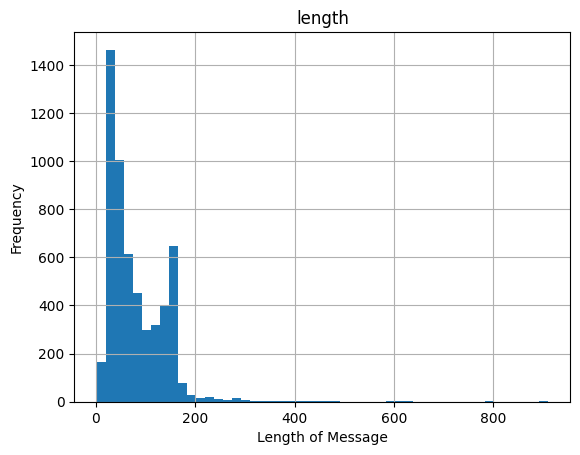

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

smsdtst.hist(bins=50, column='length')
plt.title=('Distribution of Message Lengths')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.show()

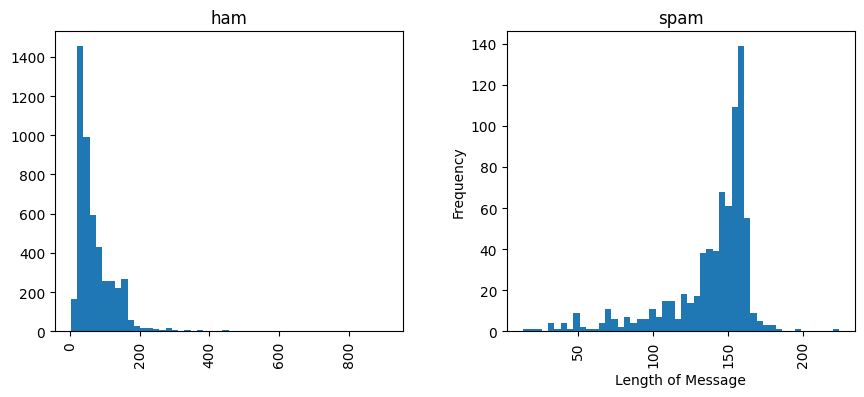

In [88]:
smsdtst.hist(column='length', by='label', bins=50,figsize=(10,4))
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.show()

In [89]:
smsdtst.loc[:,'label'] = smsdtst.label.map({'ham':0, 'spam':1})
print(smsdtst.shape)
smsdtst.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Bag of Words Approach

In [ ]:
- What we have here in our data set is a large collection of text data (5,572 rows of data). Most Machine Learning algorithms rely 
  on numerical data as input, and email/sms messages are usually have text.

- We need a way to represent text data for machine learning algorithm and the bag-of-words model helps us to achieve that task. 
  It is a way of extracting features from the text for use in machine learning algorithms.

- In this approach, we use the tokenized words for each observation and find out the frequency of each token.


In [56]:
# Step 1 : Converting all strings to their lower case form.

documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [53]:
# Step 2 : Removing all Punctuations.

punctuated_documents = []
import string

for i in lower_case_documents:
    punctuated_documents.append(i.translate(str.maketrans("","", string.punctuation)))  # removes punctuation from a string and 
                                                                                        # appends the cleaned text to punctuated_documents.

punctuated_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call hello you tomorrow']

In [51]:
# Step 3 : Tokenization 

preprocessed_documents = [[w for w in d.split()] for d in punctuated_documents]  # here 'w' is used for words and 'd' for document.
preprocessed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'hello', 'you', 'tomorrow']]

In [59]:
# Step 4 : Count Frequencies

frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


### Implementing Bag of Words in scikit-learn

In [ ]:
- Here we will look to create a frequency matrix on a smaller document set to make sure we understand how the document-term 
  matrix generation happens. We have created a sample document set ‘documents’.

documents = [‘Hello, how are you!’, ‘Win money, win from home.’, ‘Call me now.’, ‘Hello, Call hello you tomorrow?’]

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

### Data preprocessing with CountVectorizer()

In [ ]:
- In above step, we implemented a version of the CountVectorizer() method from scratch that entailed cleaning our data first.
- This cleaning involved converting all of our data to lower case and removing all punctuation marks.
- CountVectorizer() has certain parameters which take care of these steps for us. They are:
  
  lowercase = True

- The lowercase parameter has a default value of True which converts all of our text to its lower case form.
  
  token_pattern = (?u)\b\w\w+\b

- The token_pattern parameter has a default regular expression value of (?u)\b\w\w+\b which ignores all punctuation marks and 
  treats them as delimiters, while accepting alphanumeric strings of length greater than or equal to 2, as individual tokens or words.


In [ ]:
** stop_words :

- The stop_words parameter, if set to english will remove all words from our document set that match a list of English 
  stop words which is defined in scikit-learn.

In [75]:
count_vector.fit(documents)
count_vector.get_feature_names_out()

array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [63]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [76]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names_out())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(smsdtst['sms'], 
                                                    smsdtst['label'],test_size=0.20, 
                                                    random_state=1)

In [81]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

### Implementation of Naive Bayes Machine Learning Algorithm.

In [ ]:
- We will use sklearn.naive_bayes method to make predictions on our dataset for SMS Spam Detection.
- Specifically, we will be using the multinomial Naive Bayes implementation. This particular classifier is suitable for 
  classification with discrete features. It takes in integer word counts as its input.
- On the other hand Gaussian Naive Bayes is better suited for continuous data as it assumes that the input data has a 
  Gaussian(normal) distribution.

In [87]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)


MultinomialNB()

In [86]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

predictions = naive_bayes.predict(testing_data)

### Evaluating our SMS Spam Detection Model

In [ ]:
- Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various 
  mechanisms, but first let’s do quick recap of them.

- Accuracy measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions 
  to the total number of predictions (the number of test data points).

- Precision tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true 
  positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of 
  whether that was the correct classification), in other words it is the ratio of

  [True Positives/(True Positives + False Positives)]

- Recall(sensitivity) tells us what proportion of messages that actually were spam were classified by us as spam. It is a 
  ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other 
  words it is the ratio of

  [True Positives/(True Positives + False Negatives)]

- For classification problems that are skewed in their classification distributions like in our case, for example if we had 
  a 100 text messages and only 2 were spam and the rest 98 weren’t, accuracy by itself is not a very good metric.

- We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would 
  be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score.

- For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted 
  average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

- We will be using all 4 metrics to make sure our model does well. For all 4 metrics whose values can range from 0 to 1, having a 
  score as close to 1 as possible is a good indicator of how well our model is doing.

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions,pos_label="spam")))
print('Recall score: {}'.format(recall_score(y_test, predictions,pos_label="spam")))
print('F1 score: {}'.format(f1_score(y_test, predictions,pos_label="spam")))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447654
